In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
file_path = 'gdrive/My Drive/Deep Learning Project/data_in_csv/AITC.100uM/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import tensorflow as tf

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as stl
stl.use('seaborn')

from sklearn.model_selection import train_test_split

In [4]:
traces=pd.read_csv(file_path+"traces.csv", index_col=0)
print(traces.shape)
# traces.sample(15)
labels=pd.read_csv(file_path+"labels.csv", index_col=0)
# labels.sample(15)
labels["AITC.100uM"]=labels["AITC.100uM"].astype('category')
# pd.crosstab(labels["AITC.100uM"], columns="count")

(15225, 120)


In [5]:
labels["AITC.100uM"]=labels["AITC.100uM"].astype('category')
pd.crosstab(labels["AITC.100uM"], columns="count")

col_0,count
AITC.100uM,
0,12120
1,3105


In [6]:
max(list(traces.max()))

1.2929345925778999

In [7]:
labels.loc[labels["AITC.100uM"]==1,:]

,AITC.100uM
RD_190615_93_f_m3_p1_CCI_ipsi__X_33,1
RD_190615_93_f_m3_p1_CCI_ipsi__X_49,1
RD_190615_93_f_m3_p1_CCI_ipsi__X_67,1
RD_190615_93_f_m3_p1_CCI_ipsi__X_83,1
RD_190615_93_f_m3_p1_CCI_ipsi__X_95,1
...,...
RD_191024_M_42_m3_p1_Om1_Vc1__X_1548,1
RD_191024_M_42_m3_p1_Om1_Vc1__X_1551,1
RD_191024_M_42_m3_p1_Om1_Vc1__X_1559,1
RD_191024_M_42_m3_p1_Om1_Vc1__X_1562,1


In [8]:
traces.columns.astype("float32")

Float64Index([66.74400329589844, 66.78500366210938, 66.82099914550781,
              66.86299896240234,  66.9000015258789, 66.93599700927734,
              66.97699737548828, 67.01300048828125,  67.0510025024414,
              67.09200286865234,
              ...
              70.95999908447266,  71.0009994506836, 71.03600311279297,
               71.0770034790039, 71.11399841308594,  71.1500015258789,
              71.19100189208984, 71.22899627685547,  71.2699966430664,
              71.30699920654297],
             dtype='float64', length=120)

(0, 1)

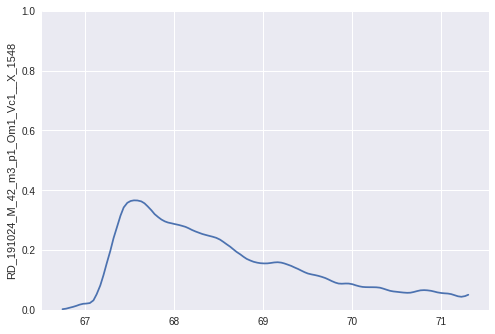

In [9]:
sns.lineplot(x=traces.columns.astype("float32"), y=traces.loc["RD_191024_M_42_m3_p1_Om1_Vc1__X_1548",:])
plt.ylim(0, 1)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(traces, labels, test_size=0.33)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [12]:
model = Sequential([
    Dense(50, activation='relu',input_shape=(traces.shape[1],)),
    Dense(20, activation='relu'),
    Dense(1, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['Accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                6050      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 7,091
Trainable params: 7,091
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(X_train, y_train, epochs=25, 
                    validation_data=(X_test,y_test ))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 10200 samples, validate on 5025 samples
Epoch 1/25
10200/10200 [==============================] - 1s 115us/sample - loss: 12.1719 - accuracy: 0.2062 - val_loss: 12.2085 - val_accuracy: 0.1994
Epoch 2/25
10200/10200 [==============================] - 1s 79us/sample - loss: 12.1719 - accuracy: 0.2062 - val_loss: 12.2085 - val_accuracy: 0.1994
Epoch 3/25
10200/10200 [==============================] - 1s 77us/sample - loss: 12.1719 - accuracy: 0.2062 - val_loss: 12.2085 - val_accuracy: 0.1994
Epoch 4/25
10200/10200 [==============================] - 1s 76us/sample - loss: 12.1719 - accuracy: 0.2062 - val_loss: 12.2085 - val_accuracy: 0.1994
Epoch 5/25
10200/10200 [==============================] - 1s 75us/sample - loss: 12.1719 - accuracy: 0.2062 - val_loss: 12.2085 - val_accuracy: 0.1994
Epoch 6/25
10200/10200 [==============================] - 1s 76us/sample - loss: 12.1719 - accuracy: 